# Doctor Consultation Fees Prediction 

Doctor's Consultation Fees Prediction Data Dexription:

We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the use case that let's you do that. 

## FEATURES: 

### Here we start the project by importing essential Libraries for Importing Datasets, EDA, Data Cleaning, Model Building, Removing Outliers, Skewness and Predicting Doctors Fees

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import joblib
import warnings
import re
from scipy.stats import zscore
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import power_transform, LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
warnings.filterwarnings('ignore')
%matplotlib inline

As we have completed importing of Essesential Libraries not we will import the data and look at the data closely

In [2]:
#here we are importing the data using pandas.read_csv()method and saving it in ds varible
ds = pd.read_excel("~/Desktop/Datatrained/Doctor Consultation Fees Prediction/Final_Train.xlsx")
dstest = pd.read_excel("~/Desktop/Datatrained/Doctor Consultation Fees Prediction/Final_Test.xlsx")

Now we will see the first 5 rows of the dataset using ds.head()

In [3]:
ds.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


from above we can see the dataset is a mixture of object and int64 type of variables

lets us get more information about the data using ds.info()

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


from above we can see there are totla 5961 rows and 7 columns in the dataset and from these 6 of them are object type columns and 1 of them is int64 

from above we can see that there are some columns which has some missing values so let us look at the missing values in the columns with the help of ds.isnull(),sum()

In [5]:
ds.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

from above we can see that there are 3 columns which has missing values so we will fix it in later point of time now let us visualize this using heatmap and look how the missing values look on the graph

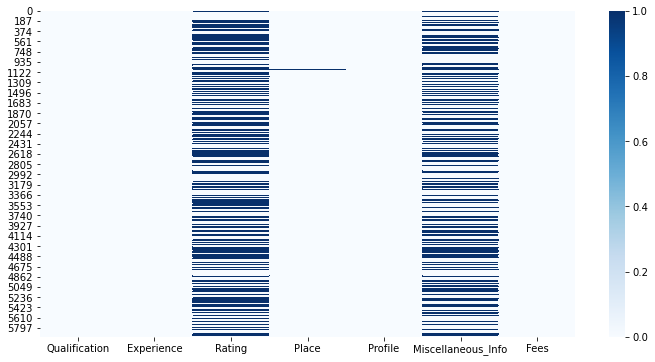

In [6]:
plt.figure(figsize = (12,6))
sns.heatmap(ds.isnull(), cmap='Blues')

from above the darker line represents the missing values in the dataset and we can figure out that which column has the missing values too from this graph

lets now see the unique values of each and every column using ds.nunique()

In [7]:
ds.nunique()

Qualification         1420
Experience              64
Rating                  51
Place                  877
Profile                  6
Miscellaneous_Info    2998
Fees                    40
dtype: int64

from above we can see unique values of every column in the dataset

lets now see the value count of all the columns

In [8]:
for i in ds.columns:
    print(ds[i].value_counts())
    print('\n')

BDS                                                                                          488
BHMS                                                                                         477
BAMS                                                                                         471
MBBS                                                                                         334
MBBS, MS - ENT                                                                               220
                                                                                            ... 
MBBS, MD - Dermatology , Venereology & Leprosy, Diploma in Medical Cosmetology                 1
BAMS, M.D. Panchakarma, M.Sc. Yoga and Naturopathy                                             1
BAMS, Doctor of Medicine                                                                       1
MD - Homeopathy, LCEH, Diploma in Preventive & Promotive Healthcare                            1
Certified In Panchkarma, Certi

from above we can see the value counts of all the unique variables in the dataset

Miscellaneous Info is an important information about the doctor so we need it we can't replace it by mode so we will fill the NaM values with Missing Category 

In [9]:
ds['Miscellaneous_Info'].fillna('Missing', inplace=True)

In [10]:
ds.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info       0
Fees                     0
dtype: int64

from above we can see that we have successfully Filled all the NaN values with Missing Category and now there are no missng values in the Miscellaneous Info Column

In [11]:
ds.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,Missing,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


lets now remove the NaN values from the Rating Column first we have to remove the % symbol using the .strip method

In [12]:
ds['Rating'] = ds['Rating'].str.strip('%').astype(float)

we can convert it into int64 because of Nan values once we fixed all the nan values we will convert it into int64

In [13]:
mean = ds['Rating'].mean()

In [14]:
ds['Rating'].loc[ds['Rating'].isnull()]

2      NaN
3      NaN
5      NaN
6      NaN
8      NaN
        ..
5951   NaN
5952   NaN
5954   NaN
5955   NaN
5957   NaN
Name: Rating, Length: 3302, dtype: float64

from above code we can see which index has the nan value in it.

lets us now remove the nan by using 0 inplace of NaN and then we will replace it by using mean, median or mode operation.

In [15]:
ds['Rating'].fillna(0, inplace=True)

In [16]:
ds.isnull().sum()

Qualification          0
Experience             0
Rating                 0
Place                 25
Profile                0
Miscellaneous_Info     0
Fees                   0
dtype: int64

from above we can see that we have removed all the NaN values from the dataset lets now see if there are any outliers in the Rating column or not

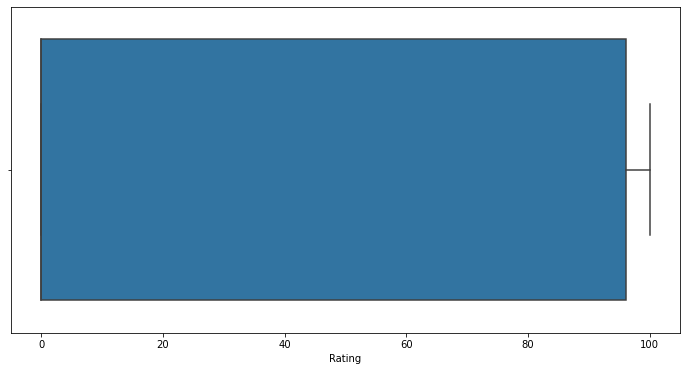

In [17]:
plt.figure(figsize = (12,6))
sns.boxplot(ds['Rating'])

from above we can see that there are no outliers in the Rating column so we will fix all the 0 values with mean of the column

In [18]:
ds['Rating'].mean()

42.21724542861936

before fixing the nan values we have saved the mean of the data in mean varible we will use that variable to fix all the 0 in the columns

In [19]:
print(mean)

94.64347499059797


we will replace all the 0 in the column with 95

In [20]:
ds['Rating'].replace(0, 94.64, inplace=True)

In [21]:
ds['Rating'].value_counts()

94.64     3302
100.00     684
98.00      290
99.00      259
97.00      241
96.00      220
95.00      178
94.00      115
93.00      109
90.00       66
92.00       66
91.00       60
89.00       42
88.00       41
85.00       27
82.00       23
86.00       21
83.00       21
80.00       19
77.00       16
87.00       14
84.00       13
79.00       13
81.00       12
67.00       12
76.00        9
71.00        9
73.00        8
75.00        8
60.00        7
74.00        7
78.00        6
56.00        5
68.00        5
69.00        4
70.00        4
72.00        3
57.00        3
62.00        2
64.00        2
55.00        2
63.00        2
33.00        2
36.00        1
45.00        1
53.00        1
40.00        1
7.00         1
48.00        1
58.00        1
47.00        1
65.00        1
Name: Rating, dtype: int64

from above we can see that we have re[placed all the 0 with the mean value of that column

In [22]:
ds.isnull().sum()

Qualification          0
Experience             0
Rating                 0
Place                 25
Profile                0
Miscellaneous_Info     0
Fees                   0
dtype: int64

let us now fix the place column 

In [23]:
ds['Place'].value_counts()

HSR Layout, Bangalore          75
Andheri West, Mumbai           70
Dwarka, Delhi                  67
Banjara Hills, Hyderabad       64
Mulund West, Mumbai            54
                               ..
Urapakkam, Chennai              1
Kuppakonanpudur, Coimbatore     1
Mount Road, Chennai             1
Yellareddyguda, Hyderabad       1
Sindhi Colony, Hyderabad        1
Name: Place, Length: 877, dtype: int64

so here we will use the top 5 cities to fill all the missing values

In [24]:
top5places = ds['Place'].value_counts().index[:5]

In [25]:
top5places

Index(['HSR Layout, Bangalore', 'Andheri West, Mumbai', 'Dwarka, Delhi',
       'Banjara Hills, Hyderabad', 'Mulund West, Mumbai'],
      dtype='object')

In [26]:
nan = ds['Place'].isnull()
nan

0       False
1       False
2       False
3       False
4       False
        ...  
5956    False
5957    False
5958    False
5959    False
5960    False
Name: Place, Length: 5961, dtype: bool

In [27]:
nan=ds[["Place"]].isnull()
count=0
for index_null in nan.index:
    if nan.loc[index_null][0]==True:
        if count%5==0:
            ds.loc[index_null,["Place"]]=top5places[0]
        if count%5==1:
            ds.loc[index_null,["Place"]]=top5places[1]
        if count%5==2:
            ds.loc[index_null,["Place"]]=top5places[2]
        if count%5==3:
            ds.loc[index_null,["Place"]]=top5places[3]
        if count%5==4:
            ds.loc[index_null,["Place"]]=top5places[4]
        count=count+1

In [28]:
ds.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
dtype: int64

from above we can see that we have fixed all the nan values from the dataset lets now see the EDA process

In [29]:
ds.head(1)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100


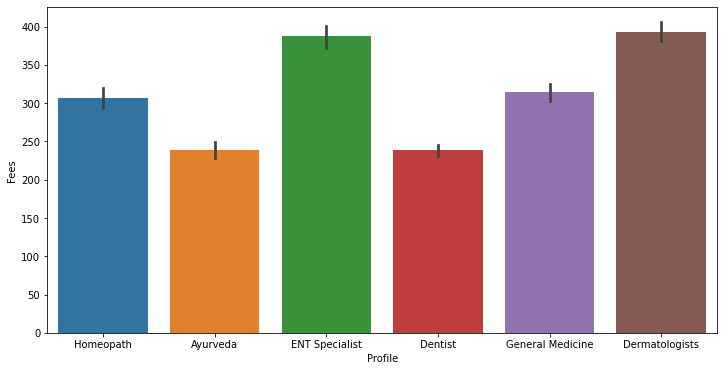

In [30]:
plt.figure(figsize = (12,6))
sns.barplot(ds['Profile'], ds['Fees'])

from here we can see the different prices for different types of Doctor Profiles

Dermatologists & ENT Specialist has the heighest Fees

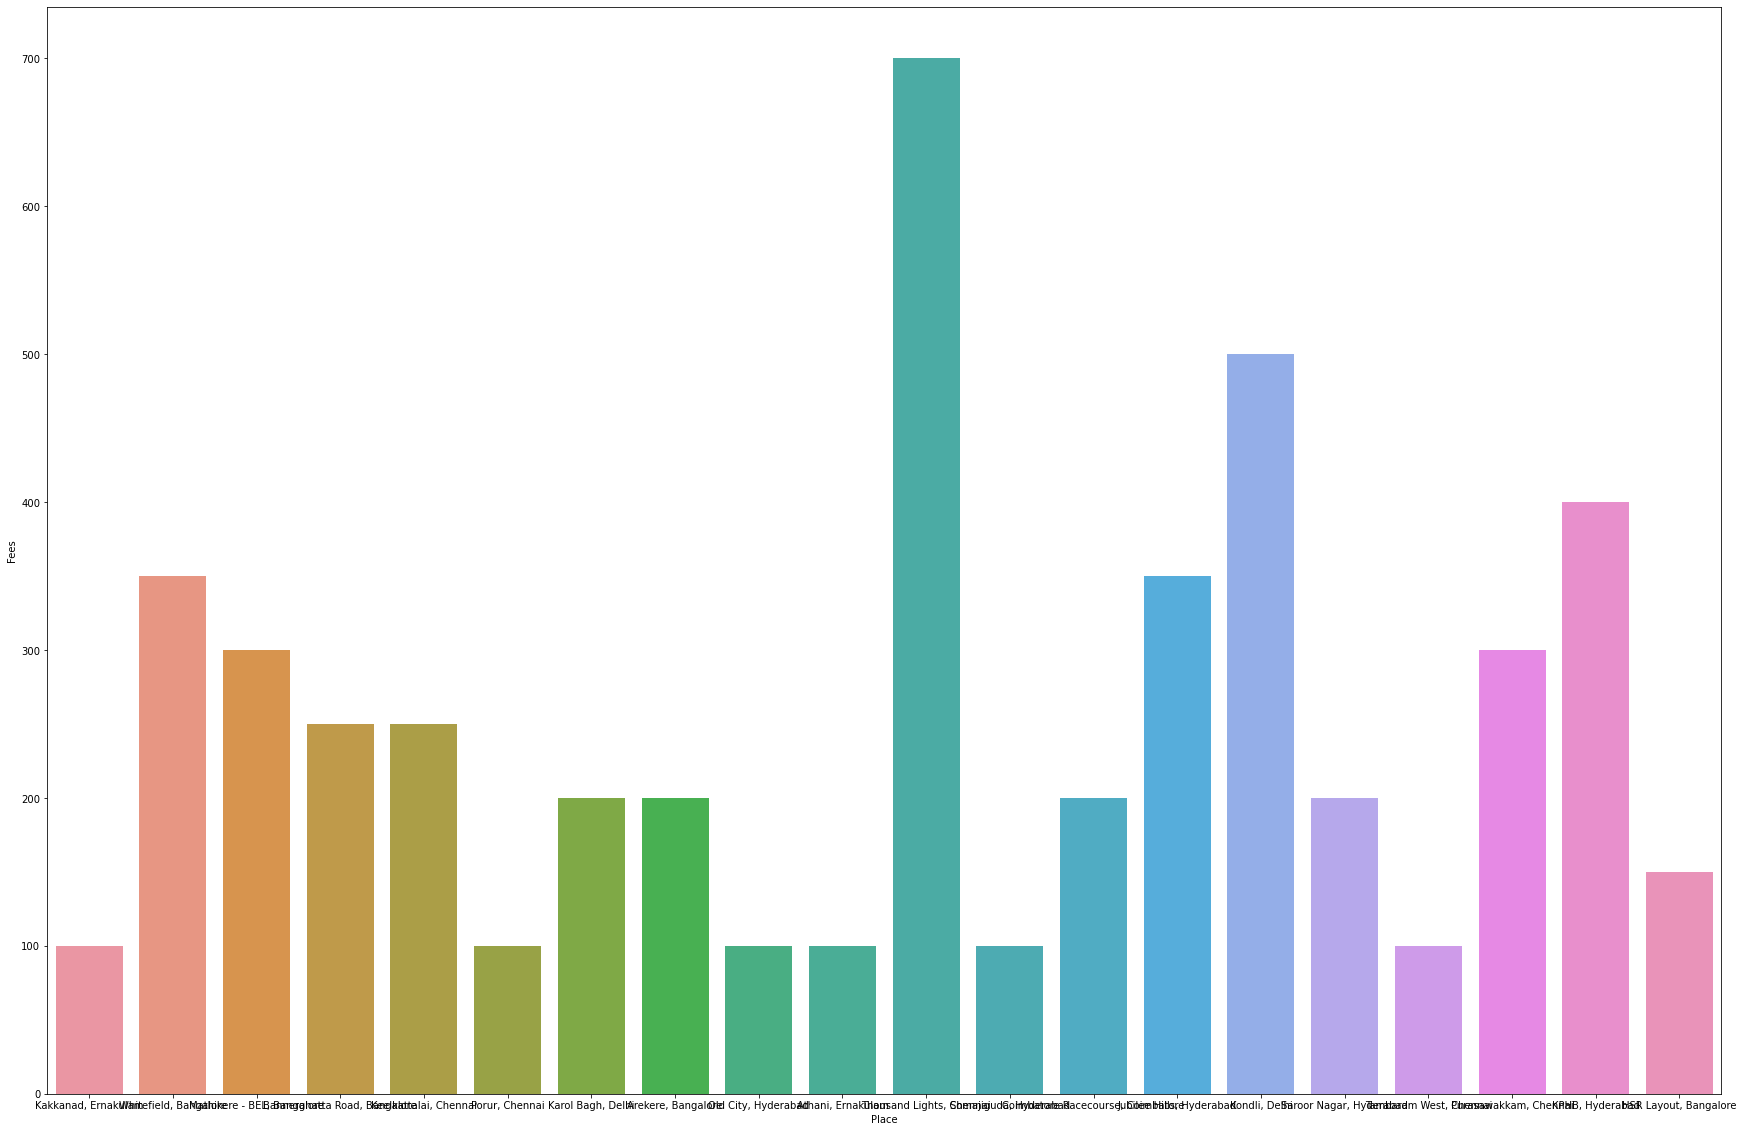

In [31]:
plt.figure(figsize = (30,20))
sns.barplot(ds['Place'][0:20], ds['Fees'])

from above we can see that the cost of Bangalore Doctor fees is higher than others

In [32]:
ds.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100.00,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98.00,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,94.64,"Mathikere - BEL, Bangalore",ENT Specialist,Missing,300
3,"BSc - Zoology, BAMS",12 years experience,94.64,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100.00,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


###  Data Pre - Processing

lets now convert experience into Numeric format

In [33]:
ds['Experience'] = ds['Experience'].str.split().str[0]
ds['Experience'] = ds['Experience'].astype(int)

In [34]:
ds.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100.00,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98.00,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,94.64,"Mathikere - BEL, Bangalore",ENT Specialist,Missing,300
3,"BSc - Zoology, BAMS",12,94.64,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100.00,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


from above we can see that we have Successfully converted out Experience Column to numeric

lets remove the spaces between the cities

In [35]:
ds['Place'] = ds['Place'].apply(lambda x: re.sub(' +','',str(x)))

In [36]:
ds.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100.00,"Kakkanad,Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98.00,"Whitefield,Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,94.64,"Mathikere-BEL,Bangalore",ENT Specialist,Missing,300
3,"BSc - Zoology, BAMS",12,94.64,"BannerghattaRoad,Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100.00,"Keelkattalai,Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [37]:
length = 0
for i in range(len(ds["Place"])):
    temp=len(ds["Place"].iloc[i].strip().upper().split(","))
    if temp>length:
        length=temp
print("Max address length is :{}".format(length))

Max address length is :3


In [38]:
place1=list()
place2=list()
for i in range(len(ds["Place"])):
    temp=ds["Place"].iloc[i].split(",")
    try :
        place1.append(temp[0].strip().upper())
    except :
        place1.append('NONE')
    try :
        place2.append(temp[1].strip().upper())
    except :
        place2.append('NONE')

In [39]:
ds["Locality"]=place1
ds["City"]=place2

In [40]:
ds.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Locality,City
0,"BHMS, MD - Homeopathy",24,100.00,"Kakkanad,Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,KAKKANAD,ERNAKULAM
1,"BAMS, MD - Ayurveda Medicine",12,98.00,"Whitefield,Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,WHITEFIELD,BANGALORE
2,"MBBS, MS - Otorhinolaryngology",9,94.64,"Mathikere-BEL,Bangalore",ENT Specialist,Missing,300,MATHIKERE-BEL,BANGALORE
3,"BSc - Zoology, BAMS",12,94.64,"BannerghattaRoad,Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,BANNERGHATTAROAD,BANGALORE
4,BAMS,20,100.00,"Keelkattalai,Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,KEELKATTALAI,CHENNAI


In [41]:
ds['Locality'].value_counts()

HSRLAYOUT       80
ANDHERIWEST     75
DWARKA          73
BANJARAHILLS    69
MULUNDWEST      59
                ..
FILMNAGAR        1
TISHAZARI        1
YAKUTPURA        1
CHULLICKAL       1
AYANAGAR         1
Name: Locality, Length: 864, dtype: int64

In [42]:
ds['City'].value_counts()

BANGALORE             1263
MUMBAI                1229
DELHI                 1189
HYDERABAD              956
CHENNAI                855
COIMBATORE             228
ERNAKULAM              153
THIRUVANANTHAPURAM      86
NONE                     1
SECTOR5                  1
Name: City, dtype: int64

from above we can see that there are 1 none and 1 sector 5

lets see what is the position of these data

In [43]:
ds[(ds['City'] == "NONE") | (ds['City'] == "SECTOR5")]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Locality,City
2169,BDS,11,94.64,"Dwarka,Sector5,Delhi",Dentist,Missing,250,DWARKA,SECTOR5
3980,BDS,23,94.64,e,Dentist,Missing,250,E,NONE


as there is no use of Place column let us drop that column

In [44]:
ds.drop('Place', axis = 1, inplace = True)

In [45]:
ds.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,Locality,City
0,"BHMS, MD - Homeopathy",24,100.00,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,KAKKANAD,ERNAKULAM
1,"BAMS, MD - Ayurveda Medicine",12,98.00,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,WHITEFIELD,BANGALORE
2,"MBBS, MS - Otorhinolaryngology",9,94.64,ENT Specialist,Missing,300,MATHIKERE-BEL,BANGALORE
3,"BSc - Zoology, BAMS",12,94.64,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,BANNERGHATTAROAD,BANGALORE
4,BAMS,20,100.00,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,KEELKATTALAI,CHENNAI


wherever the locality is Dwarka the city is Delhi, and this Sector5 is area of that so it's misclassified here. which we have to correct.

In [46]:
ds['City'] = np.where(ds['City']=="NONE","E", ds['City'])
ds['City'].loc[3980] = "Unknown"
ds['Locality'].loc[3980] = "Unknown"

In [47]:
ds[(ds['City'] == "NONE") | (ds['City'] == "SECTOR5")]

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,Locality,City
2169,BDS,11,94.64,Dentist,Missing,250,DWARKA,SECTOR5


so from above we can see that it was fixed

In [48]:
ds.groupby('City')['Locality'].nunique()

City
BANGALORE             153
CHENNAI               124
COIMBATORE             48
DELHI                 200
ERNAKULAM              52
HYDERABAD             135
MUMBAI                115
SECTOR5                 1
THIRUVANANTHAPURAM     48
Unknown                 1
Name: Locality, dtype: int64

from here we can see all the unique counts of the cities

lets now see some graphs

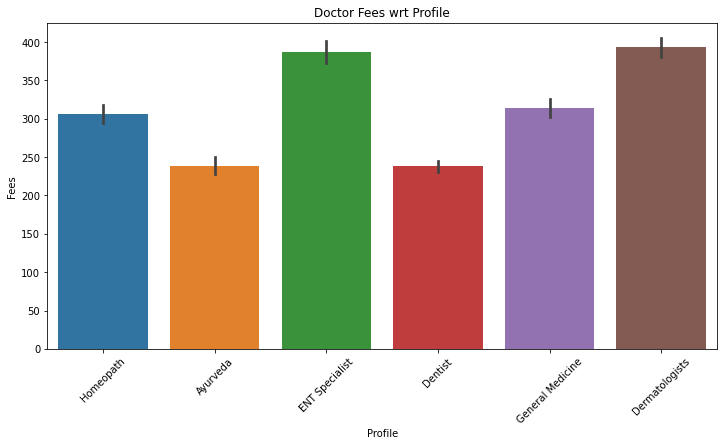

In [49]:
plt.figure(figsize=(12,6))
sns.barplot(x='Profile',y='Fees',data=ds)
plt.title("Doctor Fees wrt Profile")
plt.xticks(rotation=45)
plt.show()

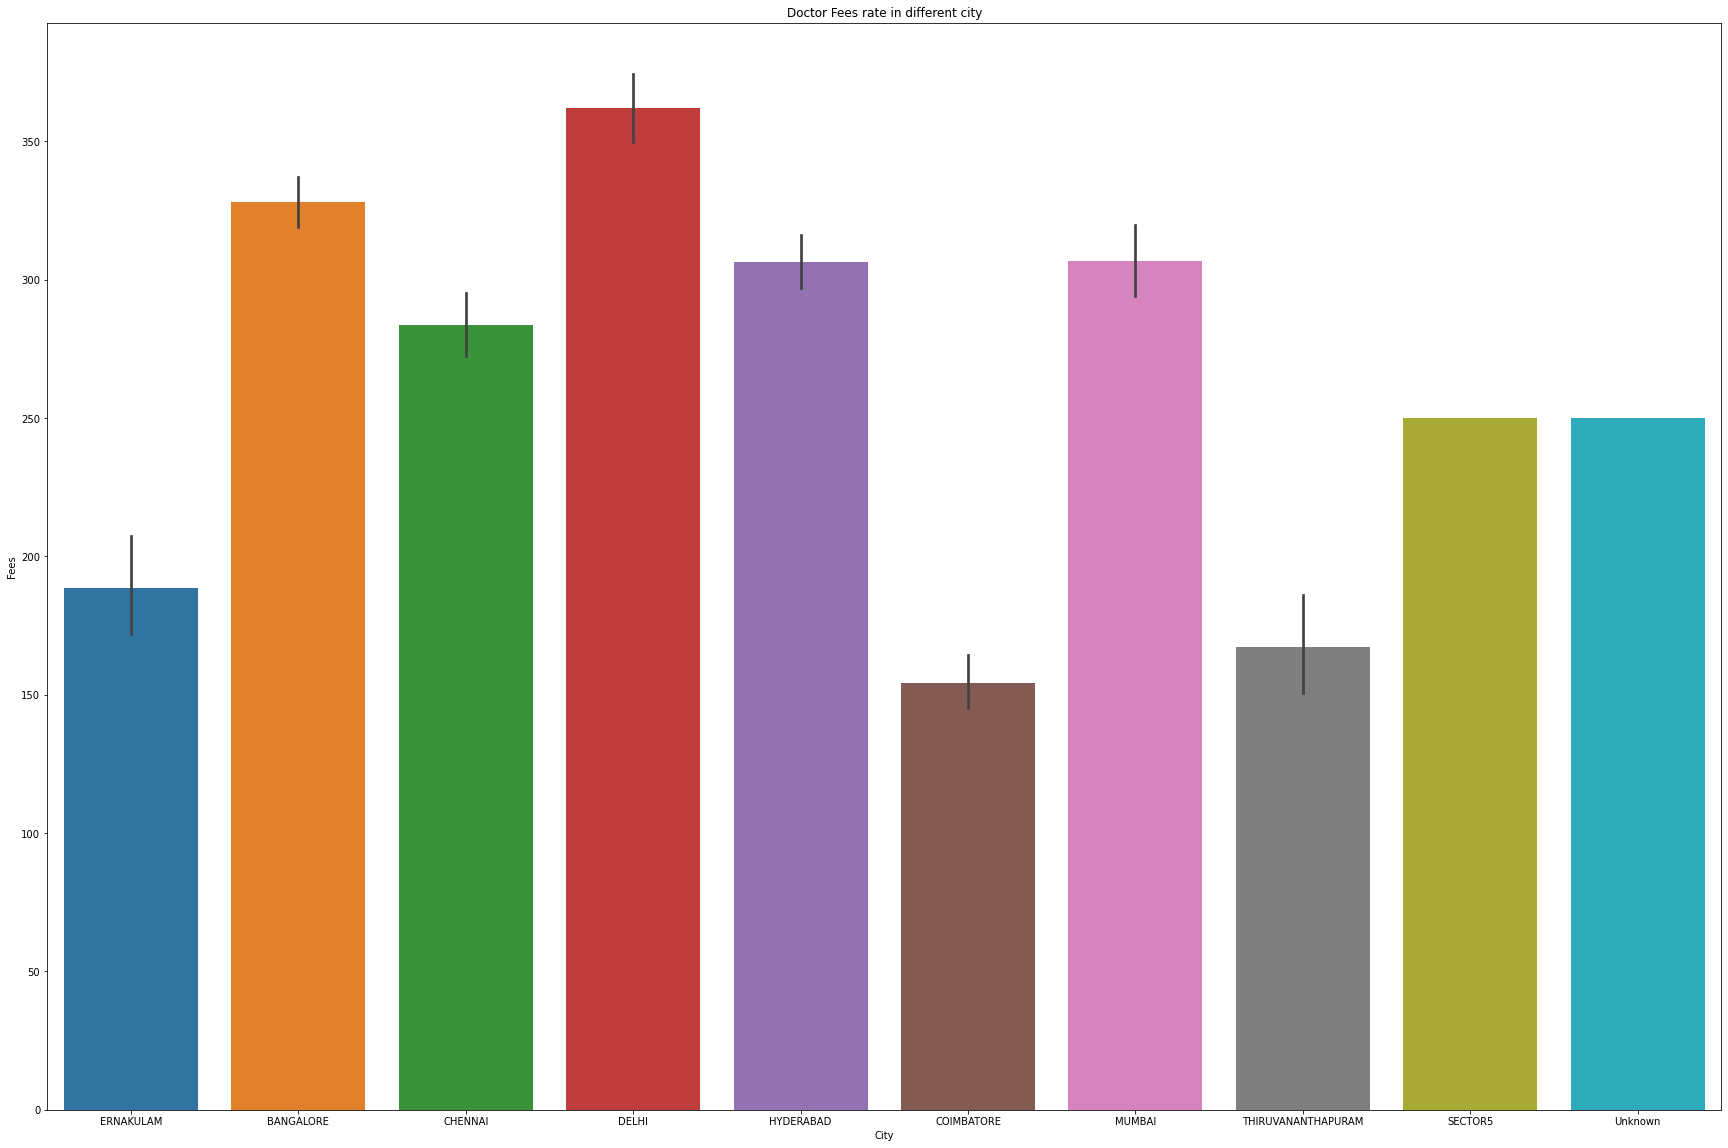

In [50]:
plt.figure(figsize=(30,20))
sns.barplot(x='City',y='Fees',data=ds)
plt.title("Doctor Fees rate in different city")
plt.xticks()
plt.show()

form above we can see that the fees in Delhi is the heighest as compared to others

metro cities like delhi, Hyderabad, Mumbai,Chennai, Bangalore has the highest fees as compared to Non metro cities

as there were only one Numeric column in the dataset and that too the target variable we will not be removing outliers and skewness from the data

lets now do one hot encoding for city and profile column

In [51]:
dsnew = pd.get_dummies(ds,columns=['City','Profile'], prefix=['City','Profile'])

In [52]:
dsnew

,Qualification,Experience,Rating,Miscellaneous_Info,Fees,Locality,City_BANGALORE,City_CHENNAI,City_COIMBATORE,City_DELHI,...,City_MUMBAI,City_SECTOR5,City_THIRUVANANTHAPURAM,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,"BHMS, MD - Homeopathy",24,100.00,"100% 16 Feedback Kakkanad, Ernakulam",100,KAKKANAD,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,"BAMS, MD - Ayurveda Medicine",12,98.00,"98% 76 Feedback Whitefield, Bangalore",350,WHITEFIELD,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,"MBBS, MS - Otorhinolaryngology",9,94.64,Missing,300,MATHIKERE-BEL,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,"BSc - Zoology, BAMS",12,94.64,"Bannerghatta Road, Bangalore ₹250 Available on...",250,BANNERGHATTAROAD,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,BAMS,20,100.00,"100% 4 Feedback Keelkattalai, Chennai",250,KEELKATTALAI,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,98.00,"98% 45 Feedback Basavanagudi, Bangalore",300,BASAVANAGUDI,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5957,MBBS,33,94.64,Missing,100,NUNGAMBAKKAM,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
5958,MBBS,41,97.00,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,GREATERKAILASHPART2,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5959,"MBBS, MD - General Medicine",15,90.00,General Medical Consultation Viral Fever Treat...,100,VILEPARLEWEST,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


from above we can see that we have done one hot encoding on City and Profile column

lets now do the same with the Qualification Column

lets see the value_count of the qualification

In [53]:
q = dsnew['Qualification'].value_counts()

In [54]:
q[:20]

BDS                                                488
BHMS                                               477
BAMS                                               471
MBBS                                               334
MBBS, MS - ENT                                     220
MBBS, MD - Dermatology                             178
MBBS, MD - General Medicine                        177
MBBS, MD - Dermatology , Venereology & Leprosy     140
BHMS, MD - Homeopathy                               93
MBBS, DDVL                                          92
MBBS, Diploma in Otorhinolaryngology (DLO)          84
BAMS, MD - Ayurveda Medicine                        82
BDS, MDS - Conservative Dentistry & Endodontics     68
MBBS, DDV                                           66
BDS, MDS                                            63
BDS, MDS - Oral & Maxillofacial Surgery             57
MD - Dermatology , Venereology & Leprosy, MBBS      52
BDS, MDS - Prosthodontics                           45
MBBS, MS -

from here we will choose the top 10 qualification for One Hot Encoding

In [55]:
ds["Qualification"]=ds["Qualification"].str.split(",")
Qualification ={}
for x in ds["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1
            

In [56]:
print(Qualification)

{'BHMS': 749, 'MD - Homeopathy': 181, 'BAMS': 764, 'MD - Ayurveda Medicine': 139, 'MBBS': 2808, 'MS - Otorhinolaryngology': 103, 'BSc - Zoology': 3, 'BDS': 1363, 'MD - General Medicine': 285, 'BSc': 3, 'MS': 2, 'DNB - ENT': 111, 'MDS': 82, 'MDS - Oral & Maxillofacial Surgery': 104, 'Diploma in Otorhinolaryngology (DLO)': 250, 'MF- Homeopathy': 5, 'MS - ENT': 411, 'DNB': 58, 'Fellowship of College of General Practice (FCGP)': 13, 'DDVL': 161, 'IBCLC (USA)': 1, 'Post Graduate Diploma in Diabetology (PGDD)': 53, 'Diploma in Dermatology': 67, 'Fellowship in Aesthetic Medicine': 23, 'DM - Neurology': 6, 'MD - Pediatrics': 13, 'Fellowship in Cleft Lip and Craniofacial Surgery': 1, 'Diploma in Cosmetology': 3, 'AFIH': 4, 'MDS - Prosthodontist And Crown Bridge': 45, 'M. D. Hom. (Practice of Medicine)': 2, 'Diploma in Emergency Medicine': 8, 'Diploma in Counselling Skills': 2, 'DHMS (Diploma in Homeopathic Medicine and Surgery)': 47, 'MD - Dermatology': 606, 'Venereology & Leprosy': 297, 'MDS -

lets extract the top 10 Qualification from this

In [57]:
top = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qual = []
for qual in top:
    final_qual.append(qual[0])
    
print(final_qual)


['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy']


In [58]:
for qual in final_qual:
    dsnew[qual] = 0

for x,y in zip(dsnew['Qualification'].values, np.array([i for i in range(len(dsnew))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            dsnew[c][y] = 1

In [59]:
dsnew

,Qualification,Experience,Rating,Miscellaneous_Info,Fees,Locality,City_BANGALORE,City_CHENNAI,City_COIMBATORE,City_DELHI,...,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,"BHMS, MD - Homeopathy",24,100.00,"100% 16 Feedback Kakkanad, Ernakulam",100,KAKKANAD,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"BAMS, MD - Ayurveda Medicine",12,98.00,"98% 76 Feedback Whitefield, Bangalore",350,WHITEFIELD,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"MBBS, MS - Otorhinolaryngology",9,94.64,Missing,300,MATHIKERE-BEL,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"BSc - Zoology, BAMS",12,94.64,"Bannerghatta Road, Bangalore ₹250 Available on...",250,BANNERGHATTAROAD,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,BAMS,20,100.00,"100% 4 Feedback Keelkattalai, Chennai",250,KEELKATTALAI,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,98.00,"98% 45 Feedback Basavanagudi, Bangalore",300,BASAVANAGUDI,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5957,MBBS,33,94.64,Missing,100,NUNGAMBAKKAM,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5958,MBBS,41,97.00,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,GREATERKAILASHPART2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5959,"MBBS, MD - General Medicine",15,90.00,General Medical Consultation Viral Fever Treat...,100,VILEPARLEWEST,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
dsnew.drop(['Qualification'],axis=1,inplace=True)

In [61]:
dsnew

,Experience,Rating,Miscellaneous_Info,Fees,Locality,City_BANGALORE,City_CHENNAI,City_COIMBATORE,City_DELHI,City_ERNAKULAM,...,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,100.00,"100% 16 Feedback Kakkanad, Ernakulam",100,KAKKANAD,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,12,98.00,"98% 76 Feedback Whitefield, Bangalore",350,WHITEFIELD,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,94.64,Missing,300,MATHIKERE-BEL,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12,94.64,"Bannerghatta Road, Bangalore ₹250 Available on...",250,BANNERGHATTAROAD,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,100.00,"100% 4 Feedback Keelkattalai, Chennai",250,KEELKATTALAI,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,98.00,"98% 45 Feedback Basavanagudi, Bangalore",300,BASAVANAGUDI,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5957,33,94.64,Missing,100,NUNGAMBAKKAM,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5958,41,97.00,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,GREATERKAILASHPART2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5959,15,90.00,General Medical Consultation Viral Fever Treat...,100,VILEPARLEWEST,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


lets us now drop Locality and Miscellaneous_info from the data

In [62]:
dsnew.drop(['Miscellaneous_Info','Locality'],axis=1,inplace=True)

In [63]:
dsnew

,Experience,Rating,Fees,City_BANGALORE,City_CHENNAI,City_COIMBATORE,City_DELHI,City_ERNAKULAM,City_HYDERABAD,City_MUMBAI,...,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,100.00,100,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12,98.00,350,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,94.64,300,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12,94.64,250,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,100.00,250,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,98.00,300,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5957,33,94.64,100,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5958,41,97.00,600,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5959,15,90.00,100,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [64]:
ds = dsnew

In [65]:
ds

,Experience,Rating,Fees,City_BANGALORE,City_CHENNAI,City_COIMBATORE,City_DELHI,City_ERNAKULAM,City_HYDERABAD,City_MUMBAI,...,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,100.00,100,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12,98.00,350,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,94.64,300,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12,94.64,250,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,100.00,250,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,98.00,300,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5957,33,94.64,100,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5958,41,97.00,600,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5959,15,90.00,100,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


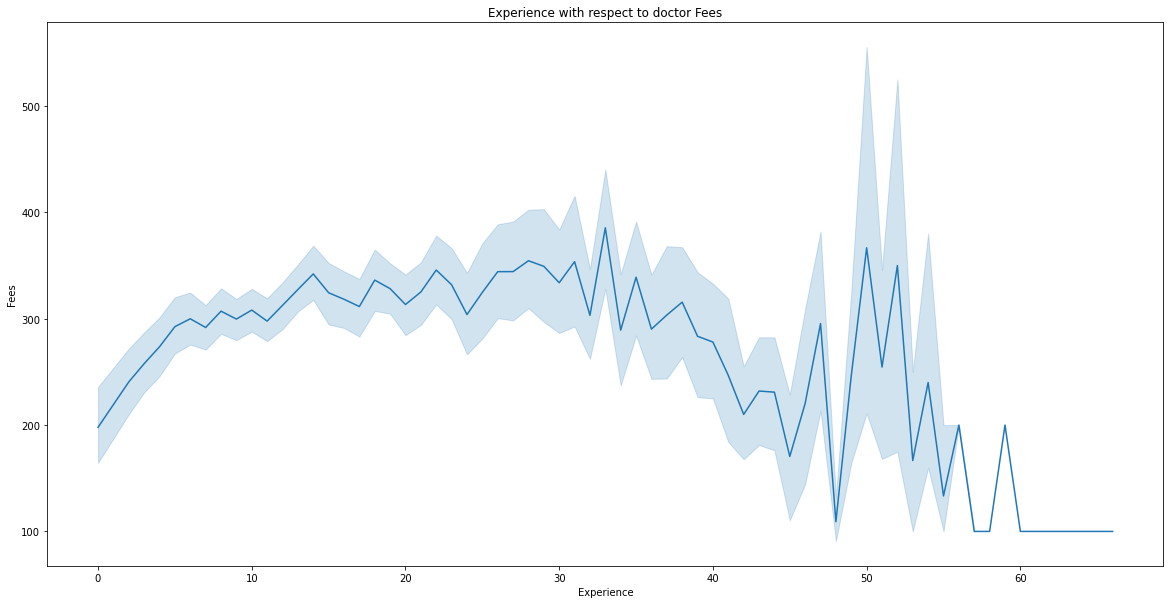

In [66]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(x='Experience',y='Fees',data=ds)
ax.set_title("Experience with respect to doctor Fees")
plt.show()

we can see that with experience the fees of the doctor also increases

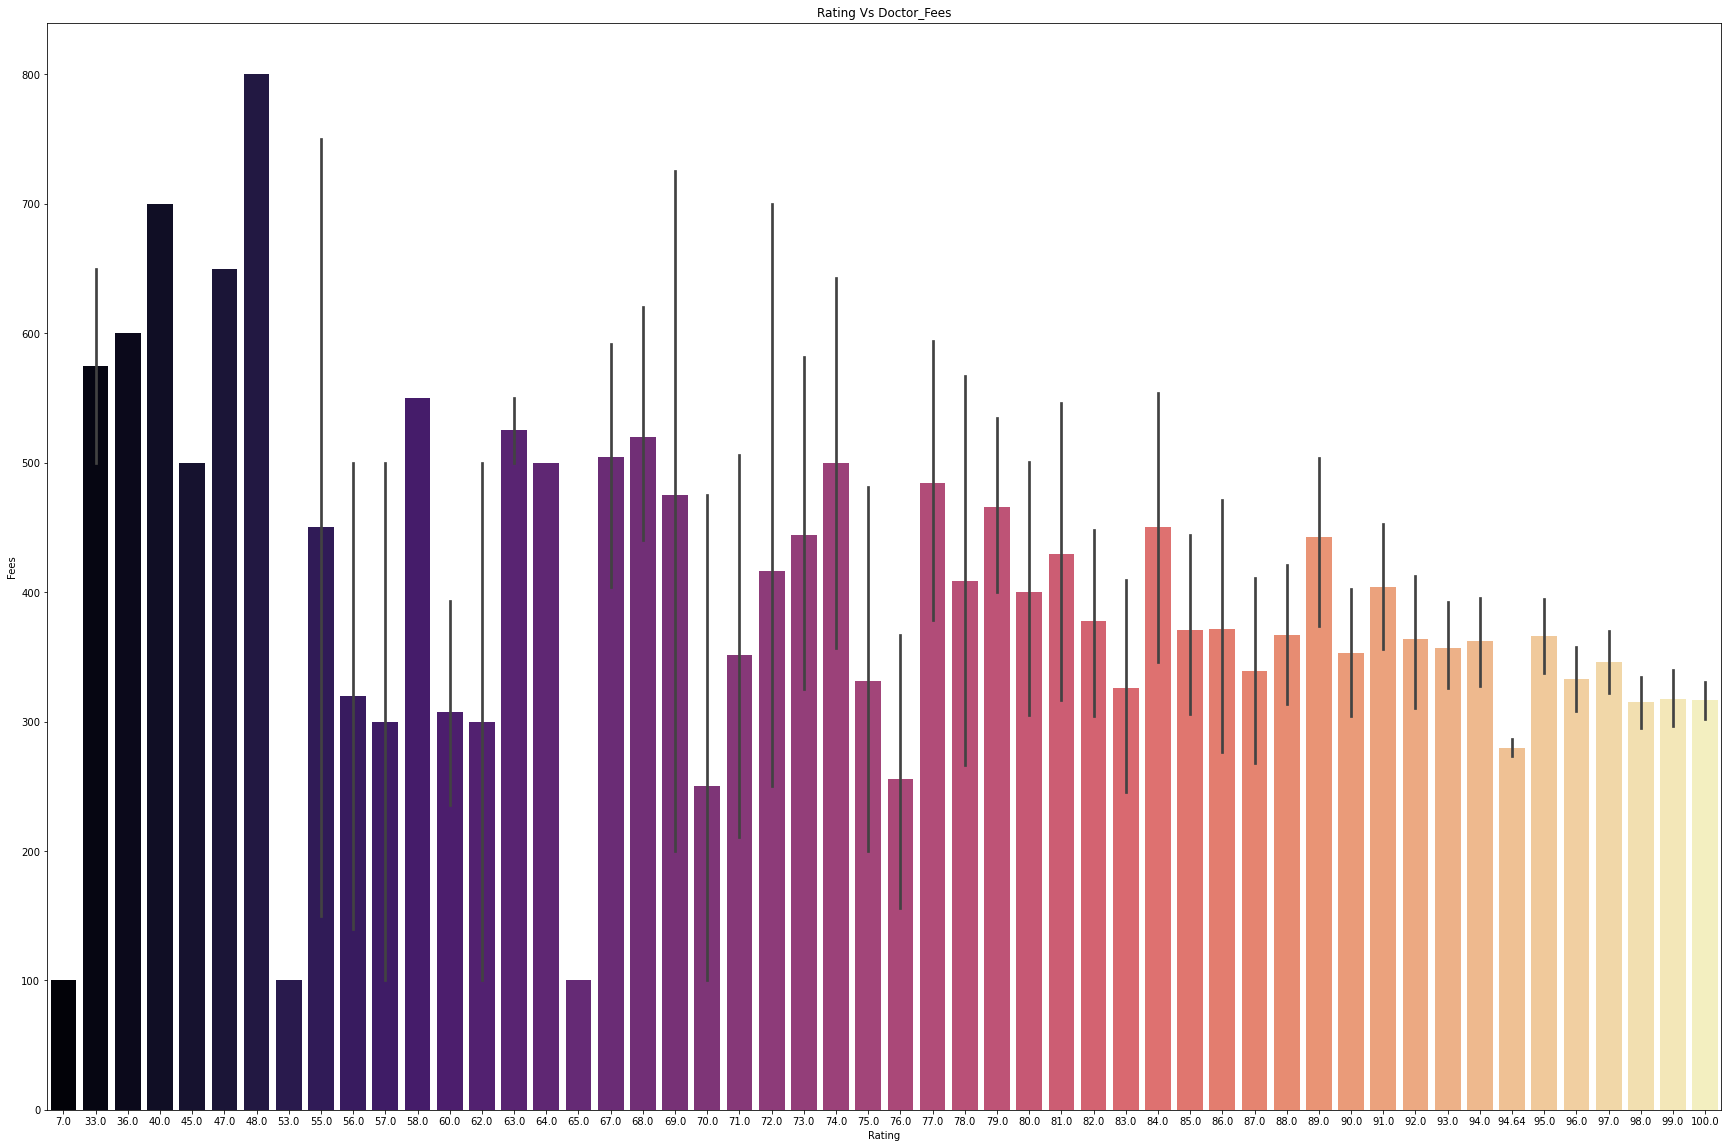

In [67]:
plt.figure(figsize=(30,20))
sns.barplot(x='Rating',y='Fees',data=ds,palette='magma')
plt.title("Rating Vs Doctor_Fees")
plt.show()

from here we can see the relation between the rating and the fees of the doctor

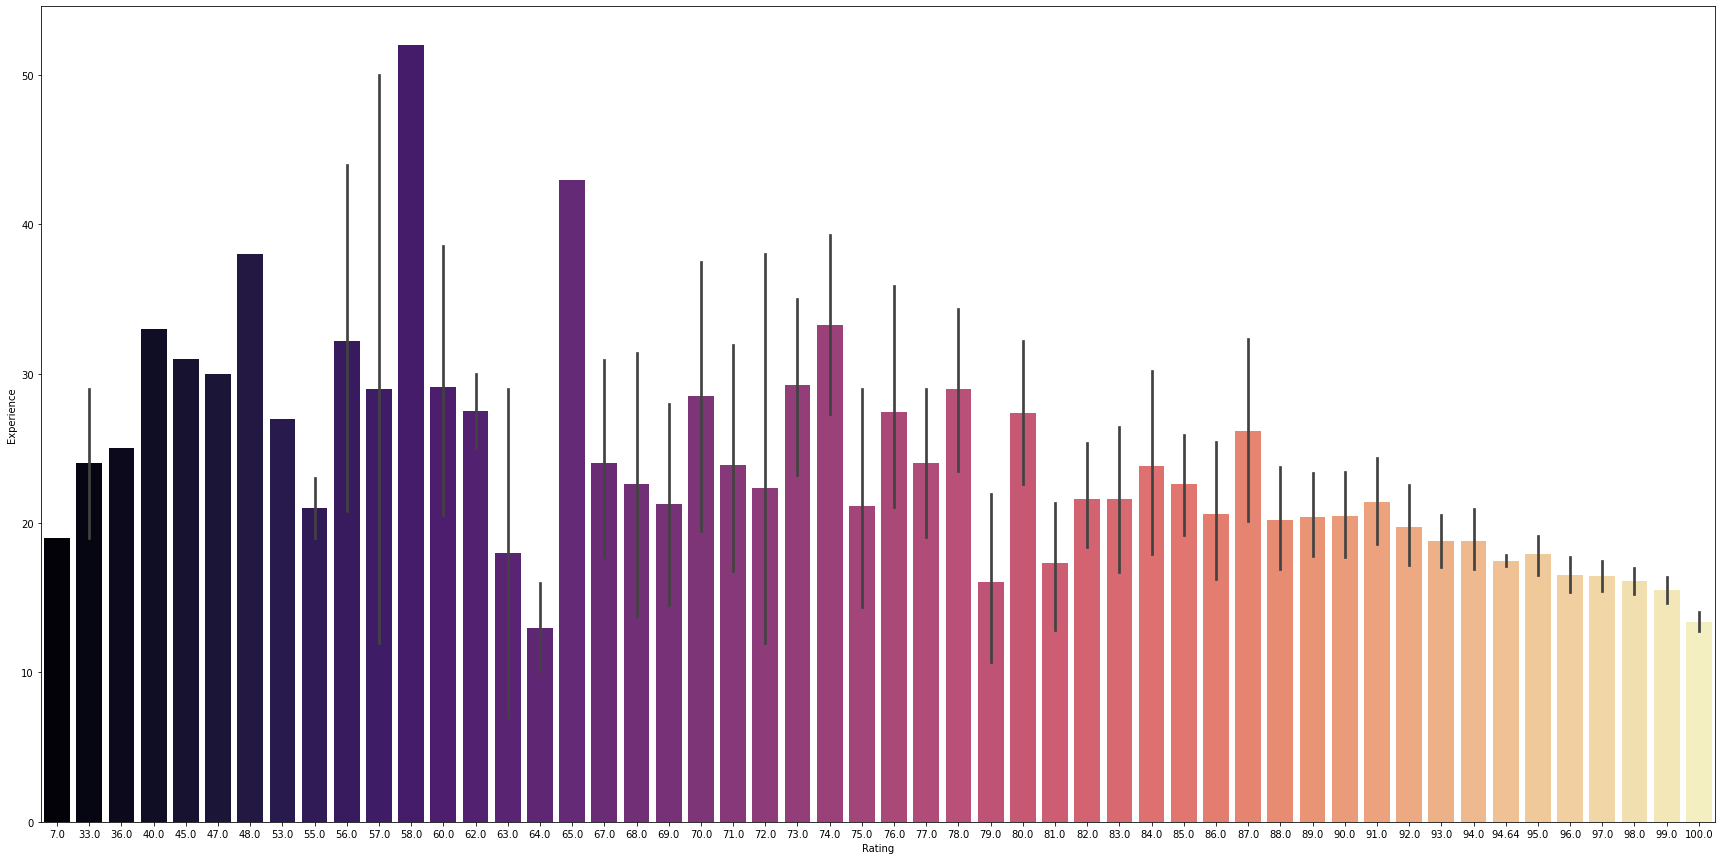

In [68]:
plt.figure(figsize=(30,15))
sns.barplot(x='Rating',y='Experience',data=ds,palette='magma')
plt.show()

from here we can see the relation between rating and Experience of the doctors

In [69]:
ds.head()

,Experience,Rating,Fees,City_BANGALORE,City_CHENNAI,City_COIMBATORE,City_DELHI,City_ERNAKULAM,City_HYDERABAD,City_MUMBAI,...,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,100.00,100,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12,98.00,350,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,94.64,300,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12,94.64,250,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,100.00,250,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


lets now divide our data set into two parts Independent columns and Dependent columns

In [70]:
X = ds.drop('Fees', axis = 1)
Y = ds['Fees']

In [71]:
X

,Experience,Rating,City_BANGALORE,City_CHENNAI,City_COIMBATORE,City_DELHI,City_ERNAKULAM,City_HYDERABAD,City_MUMBAI,City_SECTOR5,...,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,100.00,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12,98.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,94.64,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12,94.64,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,100.00,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,98.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5957,33,94.64,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5958,41,97.00,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5959,15,90.00,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
Y

0       100
1       350
2       300
3       250
4       250
       ... 
5956    300
5957    100
5958    600
5959    100
5960    200
Name: Fees, Length: 5961, dtype: int64

lets now scale the X variable

In [73]:
sc = StandardScaler()

In [74]:
X_new = sc.fit(X)
X_new = sc.fit_transform(X)

In [75]:
X_new = pd.DataFrame(X_new, columns = X.columns)

In [76]:
X_new

,Experience,Rating,City_BANGALORE,City_CHENNAI,City_COIMBATORE,City_DELHI,City_ERNAKULAM,City_HYDERABAD,City_MUMBAI,City_SECTOR5,...,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,0.600979,1.021871,-0.518496,-0.409207,-0.199424,-0.499161,6.161232,-0.437046,-0.509628,-0.012953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.476040,0.640465,1.928656,-0.409207,-0.199424,-0.499161,-0.162305,-0.437046,-0.509628,-0.012953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.745295,-0.000296,1.928656,-0.409207,-0.199424,-0.499161,-0.162305,-0.437046,-0.509628,-0.012953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.476040,-0.000296,1.928656,-0.409207,-0.199424,-0.499161,-0.162305,-0.437046,-0.509628,-0.012953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.241972,1.021871,-0.518496,2.443753,-0.199424,-0.499161,-0.162305,-0.437046,-0.509628,-0.012953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,0.152221,0.640465,1.928656,-0.409207,-0.199424,-0.499161,-0.162305,-0.437046,-0.509628,-0.012953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5957,1.408743,-0.000296,-0.518496,2.443753,-0.199424,-0.499161,-0.162305,-0.437046,-0.509628,-0.012953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5958,2.126756,0.449763,-0.518496,-0.409207,-0.199424,2.003361,-0.162305,-0.437046,-0.509628,-0.012953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5959,-0.206786,-0.885156,-0.518496,-0.409207,-0.199424,-0.499161,-0.162305,-0.437046,1.962214,-0.012953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


from above we can see that we have scaled the values and all the values are in the same range

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size = 0.22, random_state = 100)

In [78]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
lr.score(X_train, Y_train)

0.16130344409436914

In [79]:
pred = lr.predict(X_test)

In [80]:
np.sqrt(mean_squared_log_error(Y_test, pred))

0.669395883796765

from above we can see that we are getting score 0f 68% 

lets find the best random state

In [81]:
X_new

,Experience,Rating,City_BANGALORE,City_CHENNAI,City_COIMBATORE,City_DELHI,City_ERNAKULAM,City_HYDERABAD,City_MUMBAI,City_SECTOR5,...,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,0.600979,1.021871,-0.518496,-0.409207,-0.199424,-0.499161,6.161232,-0.437046,-0.509628,-0.012953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.476040,0.640465,1.928656,-0.409207,-0.199424,-0.499161,-0.162305,-0.437046,-0.509628,-0.012953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.745295,-0.000296,1.928656,-0.409207,-0.199424,-0.499161,-0.162305,-0.437046,-0.509628,-0.012953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.476040,-0.000296,1.928656,-0.409207,-0.199424,-0.499161,-0.162305,-0.437046,-0.509628,-0.012953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.241972,1.021871,-0.518496,2.443753,-0.199424,-0.499161,-0.162305,-0.437046,-0.509628,-0.012953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,0.152221,0.640465,1.928656,-0.409207,-0.199424,-0.499161,-0.162305,-0.437046,-0.509628,-0.012953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5957,1.408743,-0.000296,-0.518496,2.443753,-0.199424,-0.499161,-0.162305,-0.437046,-0.509628,-0.012953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5958,2.126756,0.449763,-0.518496,-0.409207,-0.199424,2.003361,-0.162305,-0.437046,-0.509628,-0.012953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5959,-0.206786,-0.885156,-0.518496,-0.409207,-0.199424,-0.499161,-0.162305,-0.437046,1.962214,-0.012953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
X = X_new

In [83]:
X

,Experience,Rating,City_BANGALORE,City_CHENNAI,City_COIMBATORE,City_DELHI,City_ERNAKULAM,City_HYDERABAD,City_MUMBAI,City_SECTOR5,...,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,0.600979,1.021871,-0.518496,-0.409207,-0.199424,-0.499161,6.161232,-0.437046,-0.509628,-0.012953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.476040,0.640465,1.928656,-0.409207,-0.199424,-0.499161,-0.162305,-0.437046,-0.509628,-0.012953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.745295,-0.000296,1.928656,-0.409207,-0.199424,-0.499161,-0.162305,-0.437046,-0.509628,-0.012953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.476040,-0.000296,1.928656,-0.409207,-0.199424,-0.499161,-0.162305,-0.437046,-0.509628,-0.012953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.241972,1.021871,-0.518496,2.443753,-0.199424,-0.499161,-0.162305,-0.437046,-0.509628,-0.012953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,0.152221,0.640465,1.928656,-0.409207,-0.199424,-0.499161,-0.162305,-0.437046,-0.509628,-0.012953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5957,1.408743,-0.000296,-0.518496,2.443753,-0.199424,-0.499161,-0.162305,-0.437046,-0.509628,-0.012953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5958,2.126756,0.449763,-0.518496,-0.409207,-0.199424,2.003361,-0.162305,-0.437046,-0.509628,-0.012953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5959,-0.206786,-0.885156,-0.518496,-0.409207,-0.199424,-0.499161,-0.162305,-0.437046,1.962214,-0.012953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
X.columns

Index(['Experience', 'Rating', 'City_BANGALORE', 'City_CHENNAI',
       'City_COIMBATORE', 'City_DELHI', 'City_ERNAKULAM', 'City_HYDERABAD',
       'City_MUMBAI', 'City_SECTOR5', 'City_THIRUVANANTHAPURAM',
       'City_Unknown', 'Profile_Ayurveda', 'Profile_Dentist',
       'Profile_Dermatologists', 'Profile_ENT Specialist',
       'Profile_General Medicine', 'Profile_Homeopath', 'MBBS', 'BDS', 'BAMS',
       'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy',
       'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)',
       'MD - Homeopathy'],
      dtype='object')

In [85]:
X.drop(['City_SECTOR5','City_Unknown'], axis = 1, inplace = True)

In [86]:
X

,Experience,Rating,City_BANGALORE,City_CHENNAI,City_COIMBATORE,City_DELHI,City_ERNAKULAM,City_HYDERABAD,City_MUMBAI,City_THIRUVANANTHAPURAM,...,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,0.600979,1.021871,-0.518496,-0.409207,-0.199424,-0.499161,6.161232,-0.437046,-0.509628,-0.120989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.476040,0.640465,1.928656,-0.409207,-0.199424,-0.499161,-0.162305,-0.437046,-0.509628,-0.120989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.745295,-0.000296,1.928656,-0.409207,-0.199424,-0.499161,-0.162305,-0.437046,-0.509628,-0.120989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.476040,-0.000296,1.928656,-0.409207,-0.199424,-0.499161,-0.162305,-0.437046,-0.509628,-0.120989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.241972,1.021871,-0.518496,2.443753,-0.199424,-0.499161,-0.162305,-0.437046,-0.509628,-0.120989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,0.152221,0.640465,1.928656,-0.409207,-0.199424,-0.499161,-0.162305,-0.437046,-0.509628,-0.120989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5957,1.408743,-0.000296,-0.518496,2.443753,-0.199424,-0.499161,-0.162305,-0.437046,-0.509628,-0.120989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5958,2.126756,0.449763,-0.518496,-0.409207,-0.199424,2.003361,-0.162305,-0.437046,-0.509628,-0.120989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5959,-0.206786,-0.885156,-0.518496,-0.409207,-0.199424,-0.499161,-0.162305,-0.437046,1.962214,-0.120989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
maxacc = 0
maxrs = 0
for i in range(0,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.22, random_state = i)
    lr = LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc = r2_score(Y_test, pred)
    if acc > maxacc:
        maxacc = acc
        maxrs = i
        
print("Maximum Accuracy is {} at Random_state {}".format(maxacc, maxrs))

Maximum Accuracy is 0.20003245745233922 at Random_state 267


lets use Random_State as 267 for all the models and find the best one

In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = 267)

In [89]:
print('Linear regression')
lr = LinearRegression()
lr.fit(X_train, Y_train)
predlr = lr.predict(X_test)
acclr = np.sqrt(mean_squared_log_error(Y_test, predlr))*100
print("RMSLE Score:",acclr)
print("Mean Absolute Error:", mean_absolute_error(Y_test, predlr))
print("mean Squared Error:", mean_squared_error(Y_test, predlr))
r2lr = r2_score(Y_test, predlr)*100
print("R2 Score:", r2lr)

Linear regression
RMSLE Score: 62.59275968517777
Mean Absolute Error: 133.45253997442975
mean Squared Error: 28621.609011044504
R2 Score: 20.003245745233922


In [90]:
print('Lasso regression')
las = Lasso()
las.fit(X_train, Y_train)
predlas = las.predict(X_test)
acclas = np.sqrt(mean_squared_log_error(Y_test, predlas))*100
print("RMSLE Score:",acclas)
print("Mean Absolute Error:", mean_absolute_error(Y_test, predlas))
print("mean Squared Error:", mean_squared_error(Y_test, predlas))
r2las = r2_score(Y_test, predlas)*100
print("R2 Score:", r2las)

Lasso regression
RMSLE Score: 62.65770982021739
Mean Absolute Error: 133.83617255106748
mean Squared Error: 28715.527195430735
R2 Score: 19.740746529571386


In [91]:
print('Ridge regression')
reg = Ridge()
reg.fit(X_train, Y_train)
predreg = reg.predict(X_test)
accreg = np.sqrt(mean_squared_log_error(Y_test, predreg))*100
print("RMSLE Score:",accreg)
print("Mean Absolute Error:", mean_absolute_error(Y_test, predreg))
print("mean Squared Error:", mean_squared_error(Y_test, predreg))
r2reg = r2_score(Y_test, predreg)*100
print("R2 Score:", r2reg)

Ridge regression
RMSLE Score: 62.55235877658267
Mean Absolute Error: 133.37570816922164
mean Squared Error: 28597.935872523296
R2 Score: 20.069411635627766


In [92]:
print('Decision Tree regressor')
dtr = DecisionTreeRegressor()
dtr.fit(X_train, Y_train)
preddtr = dtr.predict(X_test)
accdtr = np.sqrt(mean_squared_log_error(Y_test, preddtr))*100
print("RMSLE Score:",accdtr)
print("Mean Absolute Error:", mean_absolute_error(Y_test, preddtr))
print("mean Squared Error:", mean_squared_error(Y_test, preddtr))
r2dtr = r2_score(Y_test, preddtr)*100
print("R2 Score:", r2dtr)

Decision Tree regressor
RMSLE Score: 77.58231139803128
Mean Absolute Error: 162.5417997483546
mean Squared Error: 48264.98793611522
R2 Score: -34.89955709844126


In [93]:
print('Random Forest regressor')
rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)
predrfr = rfr.predict(X_test)
accrfr = np.sqrt(mean_squared_log_error(Y_test, predrfr))*100
print("RMSLE Score:",accrfr)
print("Mean Absolute Error:", mean_absolute_error(Y_test, predrfr))
print("mean Squared Error:", mean_squared_error(Y_test, predrfr))
r2rfr = r2_score(Y_test, predrfr)*100
print("R2 Score:", r2rfr)

Random Forest regressor
RMSLE Score: 66.89900402371903
Mean Absolute Error: 141.03507777089595
mean Squared Error: 35127.84517302972
R2 Score: 1.81846182295472


In [94]:
print('AdaBoost regressor')
adb = AdaBoostRegressor()
adb.fit(X_train, Y_train)
predadb = adb.predict(X_test)
accadb = np.sqrt(mean_squared_log_error(Y_test, predadb))*100
print("RMSLE Score:",accadb)
print("Mean Absolute Error:", mean_absolute_error(Y_test, predadb))
print("mean Squared Error:", mean_squared_error(Y_test, predadb))
r2adb = r2_score(Y_test, predadb)*100
print("R2 Score:", r2adb)

AdaBoost regressor
RMSLE Score: 67.37851180056961
Mean Absolute Error: 143.10230801727195
mean Squared Error: 30219.58173120509
R2 Score: 15.536947887864038


In [95]:
print('SVR regressor')
svr = SVR()
svr.fit(X_train, Y_train)
predsvr = svr.predict(X_test)
accsvr = np.sqrt(mean_squared_log_error(Y_test, predsvr))*100
print("RMSLE Score:",accsvr)
print("Mean Absolute Error:", mean_absolute_error(Y_test, predsvr))
print("mean Squared Error:", mean_squared_error(Y_test, predsvr))
r2svr = r2_score(Y_test, predsvr)*100
print("R2 Score:", r2svr)

SVR regressor
RMSLE Score: 61.91561869070558
Mean Absolute Error: 139.4342170843144
mean Squared Error: 32827.75453599333
R2 Score: 8.247163486222032


In [96]:
print('KNeighbour regressor')
knn = KNeighborsRegressor()
knn.fit(X_train, Y_train)
predknn = knn.predict(X_test)
accknn = np.sqrt(mean_squared_log_error(Y_test, predknn))*100
print("RMSLE Score:",accknn)
print("Mean Absolute Error:", mean_absolute_error(Y_test, predknn))
print("mean Squared Error:", mean_squared_error(Y_test, predknn))
r2knn = r2_score(Y_test, predknn)*100
print("R2 Score:", r2knn)

KNeighbour regressor
RMSLE Score: 64.27504110173372
Mean Absolute Error: 136.73917682926827
mean Squared Error: 32089.452530487804
R2 Score: 10.310701007031419


lets us compare all the RMSLE values and find the best model

lets find out the cross validation score of all the models

In [97]:
scorelr = cross_val_score(lr, X, Y, cv = 5)
scorelr = scorelr.mean()*100

In [98]:
scorelas = cross_val_score(las, X, Y, cv = 5)
scorelas = scorelas.mean()*100

In [99]:
scorereg = cross_val_score(reg, X, Y, cv = 5)
scorereg = scorereg.mean()*100

In [100]:
scoredtr = cross_val_score(dtr, X, Y, cv = 5)
scoredtr = scoredtr.mean()*100

In [101]:
scorerfr = cross_val_score(rfr, X, Y, cv = 5)
scorerfr = scorerfr.mean()*100

In [102]:
scoreadb = cross_val_score(adb, X, Y, cv = 5)
scoreadb = scoreadb.mean()*100

In [103]:
scoresvr = cross_val_score(svr, X, Y, cv = 5)
scoresvr = scoresvr.mean()*100

In [104]:
scoreknn = cross_val_score(knn, X, Y, cv = 5)
scoreknn = scoreknn.mean()*100

lets now compare the RMSLE score r2 score and cross validation score to find out the best model

In [105]:
diff = {
    'Model Name':['Linear Regression','Lasso', 'Ridge Regression','Decision Tree', 'Random Forest', 'AdaBoost', 'SVR', 'KNeighborsRegressor'],
    'RMSLE Score':[acclr,acclas, accreg,accdtr, accrfr, accadb, accsvr, accknn],
    'R2 Score':[r2lr, r2las, r2reg, r2dtr, r2rfr, r2adb, r2svr, r2knn],
    'Cross Validation Score':[scorelr, scorelas, scorereg, scoredtr, scorerfr, scoreadb, scoresvr, scoreknn],
    'R2 Score - Cross Validation Score':[r2lr-scorelr, r2las-scorelas, r2reg-scorereg, r2dtr-scoredtr, r2rfr - scorerfr, r2adb - scoreadb, r2svr - scoresvr, r2knn - scoreknn]
}


In [106]:
difference = pd.DataFrame.from_dict(diff)

In [107]:
difference

,Model Name,RMSLE Score,R2 Score,Cross Validation Score,R2 Score - Cross Validation Score
0,Linear Regression,62.592760,20.003246,14.520807,5.482439
1,Lasso,62.657710,19.740747,14.561421,5.179325
2,Ridge Regression,62.552359,20.069412,14.587901,5.481510
3,Decision Tree,77.582311,-34.899557,-35.698559,0.799002
4,Random Forest,66.899004,1.818462,-0.843755,2.662217
5,AdaBoost,67.378512,15.536948,10.186828,5.350120
6,SVR,61.915619,8.247163,7.609704,0.637460
7,KNeighborsRegressor,64.275041,10.310701,3.852425,6.458276


lets find out the GridSearchCV for the models

In [108]:
parameterlr = {
    'n_jobs':[1,2,3,4]
}

In [109]:
parameterlas = {
    'alpha':[0.1,0.2,0.3],
    'selection':['cyclic','random']
}

In [110]:
parameterreg = {
    'alpha':[1,2,3,4],
    'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']
}

In [111]:
parameterdtr = {
    'criterion':['mse','friedman_mse','mae','poisson'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5]
}

In [112]:
parameterrfr = {
    'n_estimators':[100,200,300,400],
    'criterion':['mse','mae'],
    'max_depth':[1,2,3]
}

In [113]:
parameteradb = {
    'n_estimators':[100,200,300,400],
    'loss':['linear','square','exponential']
}

In [114]:
parametersvr = {
    'kernel':['linear','poly','rbf'],
    'degree':[1,2,3],
    'C':[1,2,3,4]
}

In [115]:
parameterknn = {
    'n_neighbors':[1,2,3,4,5],
    'weights':['uniform','distance'],
    'algorithm':['auto','kd_tree','ball_tree','brute'],
    'n_jobs':[1,2,3,4]
}

In [116]:
GSCVlr = GridSearchCV(lr, parameterlr)
GSCVlas = GridSearchCV(las, parameterlas)
GSCVreg = GridSearchCV(reg, parameterreg)
GSCVdtc = GridSearchCV(dtr, parameterdtr)
GSCVrfr = GridSearchCV(rfr, parameterrfr)
GSCVadb = GridSearchCV(adb, parameteradb)
GSCVsvr = GridSearchCV(svr, parametersvr)
GSCVknn = GridSearchCV(knn, parameterknn)

In [117]:
GSCVlr.fit(X_train, Y_train)

GridSearchCV(estimator=LinearRegression(), param_grid={'n_jobs': [1, 2, 3, 4]})

In [118]:
GSCV_predictlr = GSCVlr.best_estimator_.predict(X_test)
print("RMSLE Score:", np.sqrt(mean_squared_log_error(Y_test, GSCV_predictlr)))

RMSLE Score: 0.6259275968517777


In [119]:
GSCVlas.fit(X_train, Y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.1, 0.2, 0.3],
                         'selection': ['cyclic', 'random']})

In [120]:
GSCV_predictlas = GSCVlas.best_estimator_.predict(X_test)
print("RMSLE Score:", np.sqrt(mean_squared_log_error(Y_test, GSCV_predictlas)))

RMSLE Score: 0.6256014707801596


In [121]:
GSCVreg.fit(X_train, Y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']})

In [122]:
GSCV_predictreg = GSCVreg.best_estimator_.predict(X_test)
print("RMSLE Score:", np.sqrt(mean_squared_log_error(Y_test, GSCV_predictreg)))

RMSLE Score: 0.6255498077351181


In [123]:
GSCVdtc.fit(X_train, Y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']})

In [124]:
GSCV_predictdtc = GSCVdtc.best_estimator_.predict(X_test)
print("RMSLE Score:", np.sqrt(mean_squared_log_error(Y_test, GSCV_predictdtc)))

RMSLE Score: 0.6464560702744275


In [125]:
GSCVrfr.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [1, 2, 3],
                         'n_estimators': [100, 200, 300, 400]})

In [126]:
GSCV_predictrfr = GSCVrfr.best_estimator_.predict(X_test)
print("RMSLE Score:", np.sqrt(mean_squared_log_error(Y_test, GSCV_predictrfr)))

RMSLE Score: 0.643398973067076


In [127]:
GSCVadb.fit(X_train, Y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [100, 200, 300, 400]})

In [128]:
GSCV_predictadb = GSCVadb.best_estimator_.predict(X_test)
print("RMSLE Score:", np.sqrt(mean_squared_log_error(Y_test, GSCV_predictadb)))

RMSLE Score: 0.6757891354570268


In [129]:
GSCVsvr.fit(X_train, Y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 2, 3, 4], 'degree': [1, 2, 3],
                         'kernel': ['linear', 'poly', 'rbf']})

In [130]:
GSCV_predictsvr = GSCVsvr.best_estimator_.predict(X_test)
print("RMSLE Score:", np.sqrt(mean_squared_log_error(Y_test, GSCV_predictsvr)))

RMSLE Score: 0.6006307330966933


In [131]:
GSCVknn.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'kd_tree', 'ball_tree', 'brute'],
                         'n_jobs': [1, 2, 3, 4], 'n_neighbors': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']})

In [132]:
GSCV_predictknn = GSCVknn.best_estimator_.predict(X_test)
print("RMSLE Score:", np.sqrt(mean_squared_log_error(Y_test, GSCV_predictknn)))

RMSLE Score: 0.6427504110173372


from above we can see that AdaBoost Regressor has done well so we will save Adaboost as our best model

In [133]:
joblib.dump(GSCVadb.best_estimator_,'DoctorConsultationFees.pkl')

['DoctorConsultationFees.pkl']

now lets us import test data and find out the fees of the doctors

In [134]:
dstest = pd.read_excel("~/Desktop/Datatrained/Doctor Consultation Fees Prediction/Final_Test.xlsx")

In [135]:
dstest.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


we have saved our test data in dstest varibale lets do all the transformations that we have done in our train variable

In [136]:
dstest.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

lets us fix the null values first

In [137]:
ds['Rating'].mean()

94.64155007549655

lets us fix the missing values as 94.94

In [138]:
dstest['Rating'].fillna('94.64%', inplace = True)

In [139]:
dstest.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,94.64%,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,94.64%,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,94.64%,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


lets us now remove all the % symbol using str.strip() method

In [140]:
dstest['Rating'] = dstest['Rating'].str.strip('%').astype(float)

In [141]:
dstest

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,94.64,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,94.64,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70.00,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,94.64,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100.00,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,94.64,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,94.64,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,94.64,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98.00,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [142]:
dstest.isnull().sum()

Qualification           0
Experience              0
Rating                  0
Place                   6
Profile                 0
Miscellaneous_Info    834
dtype: int64

lets now fix place column

In [143]:
top5places = dstest['Place'].value_counts().index[:5]

In [144]:
top5places

Index(['Andheri West, Mumbai', 'Mulund West, Mumbai', 'Dwarka, Delhi',
       'Whitefield, Bangalore', 'HSR Layout, Bangalore'],
      dtype='object')

In [145]:
nan = dstest['Place'].isnull()
nan

0       False
1       False
2       False
3       False
4       False
        ...  
1982    False
1983    False
1984    False
1985    False
1986    False
Name: Place, Length: 1987, dtype: bool

In [146]:
nan=dstest[["Place"]].isnull()
count=0
for index_null in nan.index:
    if nan.loc[index_null][0]==True:
        if count%5==0:
            dstest.loc[index_null,["Place"]]=top5places[0]
        if count%5==1:
            dstest.loc[index_null,["Place"]]=top5places[1]
        if count%5==2:
            dstest.loc[index_null,["Place"]]=top5places[2]
        if count%5==3:
            dstest.loc[index_null,["Place"]]=top5places[3]
        if count%5==4:
            dstest.loc[index_null,["Place"]]=top5places[4]
        count=count+1

In [147]:
dstest.isnull().sum()

Qualification           0
Experience              0
Rating                  0
Place                   0
Profile                 0
Miscellaneous_Info    834
dtype: int64

so we can see that we have removed NaN values from the Place column lets us now remove it from the Miscellaneous_Info Column

In [148]:
dstest['Miscellaneous_Info'].fillna('Missing', inplace = True)

In [149]:
dstest.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
dtype: int64

from above  we can see that we have removed all the NaN values from all the columns lets us now do some more preprocessing 

In [150]:
dstest

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,94.64,"Ghatkopar East, Mumbai",General Medicine,Missing
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,94.64,"West Marredpally, Hyderabad",ENT Specialist,Missing
2,"MBBS, DDVL",40 years experience,70.00,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,94.64,"New Ashok Nagar, Delhi",Ayurveda,Missing
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100.00,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,94.64,"Basavanagudi, Bangalore",Ayurveda,Missing
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,94.64,"Choolai, Chennai",Dermatologists,Missing
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,94.64,"Porur, Chennai",General Medicine,Missing
1985,BDS,12 years experience,98.00,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [151]:
dstest['Experience'] = dstest['Experience'].str.split().str[0]
dstest['Experience'] = dstest['Experience'].astype(int)

In [152]:
dstest['Place'] = dstest['Place'].apply(lambda x: re.sub(' +','',str(x)))

In [153]:
dstest.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35,94.64,"GhatkoparEast,Mumbai",General Medicine,Missing
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,94.64,"WestMarredpally,Hyderabad",ENT Specialist,Missing
2,"MBBS, DDVL",40,70.00,"KKNagar,Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0,94.64,"NewAshokNagar,Delhi",Ayurveda,Missing
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100.00,"KanakpuraRoad,Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [154]:
place1=list()
place2=list()
for i in range(len(dstest["Place"])):
    temp=dstest["Place"].iloc[i].split(",")
    try :
        place1.append(temp[0].strip().upper())
    except :
        place1.append('NONE')
    try :
        place2.append(temp[1].strip().upper())
    except :
        place2.append('NONE')

In [155]:
dstest['Locality'] = place1
dstest['City'] = place2

In [156]:
dstest

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Locality,City
0,MBBS,35,94.64,"GhatkoparEast,Mumbai",General Medicine,Missing,GHATKOPAREAST,MUMBAI
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,94.64,"WestMarredpally,Hyderabad",ENT Specialist,Missing,WESTMARREDPALLY,HYDERABAD
2,"MBBS, DDVL",40,70.00,"KKNagar,Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",KKNAGAR,CHENNAI
3,BAMS,0,94.64,"NewAshokNagar,Delhi",Ayurveda,Missing,NEWASHOKNAGAR,DELHI
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100.00,"KanakpuraRoad,Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,KANAKPURAROAD,BANGALORE
...,...,...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10,94.64,"Basavanagudi,Bangalore",Ayurveda,Missing,BASAVANAGUDI,BANGALORE
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,94.64,"Choolai,Chennai",Dermatologists,Missing,CHOOLAI,CHENNAI
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,94.64,"Porur,Chennai",General Medicine,Missing,PORUR,CHENNAI
1985,BDS,12,98.00,"Arekere,Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,AREKERE,BANGALORE


In [157]:
dstest.drop('Place', axis = 1, inplace =True)

In [158]:
dsnew = pd.get_dummies(dstest,columns=['City','Profile'], prefix=['City','Profile'])

In [159]:
dsnew

,Qualification,Experience,Rating,Miscellaneous_Info,Locality,City_BANGALORE,City_CHENNAI,City_COIMBATORE,City_DELHI,City_ERNAKULAM,City_HYDERABAD,City_MUMBAI,City_THIRUVANANTHAPURAM,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,MBBS,35,94.64,Missing,GHATKOPAREAST,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,94.64,Missing,WESTMARREDPALLY,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,"MBBS, DDVL",40,70.00,"70% 4 Feedback KK Nagar, Chennai",KKNAGAR,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,BAMS,0,94.64,Missing,NEWASHOKNAGAR,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100.00,General Dentistry Conservative Dentistry Cosme...,KANAKPURAROAD,1,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10,94.64,Missing,BASAVANAGUDI,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,94.64,Missing,CHOOLAI,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,94.64,Missing,PORUR,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1985,BDS,12,98.00,RCT - Root Canal Treatment Root Canal Treatmen...,AREKERE,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [160]:
dsnew["Qualification"]=dsnew["Qualification"].str.split(",")
Qualification ={}
for x in dsnew["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1
            

In [161]:
top = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qual = []
for qual in top:
    final_qual.append(qual[0])
    
print(final_qual)


['MBBS', 'BDS', 'BHMS', 'BAMS', 'MD - Dermatology', 'MS - ENT', 'MD - General Medicine', 'Venereology & Leprosy', 'Diploma in Otorhinolaryngology (DLO)', 'DDVL']


In [162]:
for qual in final_qual:
    dsnew[qual] = 0

for x,y in zip(dsnew['Qualification'].values, np.array([i for i in range(len(dsnew))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            dsnew[c][y] = 1

In [163]:
dsnew

,Qualification,Experience,Rating,Miscellaneous_Info,Locality,City_BANGALORE,City_CHENNAI,City_COIMBATORE,City_DELHI,City_ERNAKULAM,...,MBBS,BDS,BHMS,BAMS,MD - Dermatology,MS - ENT,MD - General Medicine,Venereology & Leprosy,Diploma in Otorhinolaryngology (DLO),DDVL
0,[MBBS],35,94.64,Missing,GHATKOPAREAST,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,"[MBBS, Diploma in Otorhinolaryngology (DLO)]",31,94.64,Missing,WESTMARREDPALLY,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,"[MBBS, DDVL]",40,70.00,"70% 4 Feedback KK Nagar, Chennai",KKNAGAR,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,[BAMS],0,94.64,Missing,NEWASHOKNAGAR,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,"[BDS, MDS - Conservative Dentistry & Endodont...",16,100.00,General Dentistry Conservative Dentistry Cosme...,KANAKPURAROAD,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,"[BAMS, Doctor of Medicine]",10,94.64,Missing,BASAVANAGUDI,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1983,"[MD - Dermatology , Venereology & Leprosy, M...",4,94.64,Missing,CHOOLAI,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
1984,"[MBBS, MD / MS - Obstetrics & Gynaecology]",9,94.64,Missing,PORUR,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1985,[BDS],12,98.00,RCT - Root Canal Treatment Root Canal Treatmen...,AREKERE,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [164]:
dsnew.drop(['Qualification'],axis=1,inplace=True)

In [165]:
dsnew.head()

,Experience,Rating,Miscellaneous_Info,Locality,City_BANGALORE,City_CHENNAI,City_COIMBATORE,City_DELHI,City_ERNAKULAM,City_HYDERABAD,...,MBBS,BDS,BHMS,BAMS,MD - Dermatology,MS - ENT,MD - General Medicine,Venereology & Leprosy,Diploma in Otorhinolaryngology (DLO),DDVL
0,35,94.64,Missing,GHATKOPAREAST,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,31,94.64,Missing,WESTMARREDPALLY,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
2,40,70.00,"70% 4 Feedback KK Nagar, Chennai",KKNAGAR,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,94.64,Missing,NEWASHOKNAGAR,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,16,100.00,General Dentistry Conservative Dentistry Cosme...,KANAKPURAROAD,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [166]:
dsnew.drop('Miscellaneous_Info', axis = 1, inplace = True)

In [167]:
dsnew.drop('Locality', axis = 1, inplace = True)

In [168]:
savemodel = joblib.load('DoctorConsultationFees.pkl')

In [169]:
savemodel.predict(dsnew)

array([280.121673  , 280.121673  , 262.59414226, ..., 280.121673  ,
       280.121673  , 262.59414226])

In [171]:
predicted_Doctor_Price = savemodel.predict(dsnew)

In [174]:
predicted_Doctor_Price = pd.DataFrame(predicted_Doctor_Price)

In [175]:
predicted_Doctor_Price

,0
0,280.121673
1,280.121673
2,262.594142
3,404.775936
4,280.121673
...,...
1982,280.121673
1983,262.594142
1984,280.121673
1985,280.121673


using joblib.load we imported the saved model and then we used that model to predict the new file

### Using DoctorConsultationFees.pkl file we can predict any Doctor Fees if it has the same columns 